In [1]:
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
!pip install lib
from lib import *

  Stored in directory: /root/.cache/pip/wheels/52/de/da/0ef2064c4b4a213d27518228ebd79a2349e1b81341b05f7196
Successfully built lib


Logistic Regression is a classification algorithm in combination with a decision rule that makes dichotomous(二分法) the predicted probabilities of the outcome. Currently, it is one of the most widely used classification models in Machine Learning.


As discussed in the lecture, Logistic Regression predicts the label yhat of a given point x by
**yhat=argmaxyP(y|x;w)**

and the condition probability is defined as

**P(y|x;w)=[σ(w⊤x)^y']*[(1-σ(w⊤x)^(1-y')]**, 

where y′=(y+1)/2. y=1 or -1
Let's first plot the logistic function σ over **z=w⊤x**

**σ(z)=exp(z)/exp(z)+1=1/(1+exp(−z))**

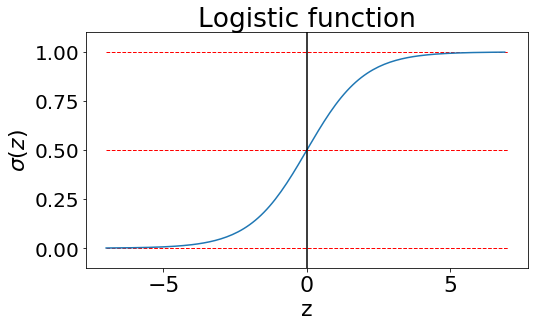

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma = logistic(z)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(z, sigma)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')
plt.hlines(y=1.0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.tight_layout()
for item in (ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('fig-logistic.png', dpi=300)
plt.show()

We can see that σ(z) approaches 1 when (z→∞), since e^−z becomes very small for large values of z.

The logistic function takes real number values as input and transforms them to values in the range [0,1] with an intercept at σ(z)=0.5.
Once w is solved, we can then make predictions by
**yhat=argmaxyP(y|x;w)=argmaxy{σ(w⊤x),1−σ(w⊤x)}=sign(w⊤x).**

Logistic Regression is very easy to implement but performs well on **linearly separable classes** (or classes close to linearly separable). Similar to the Perceptron and Adaline, the Logistic Regression model is also a linear model for **binary classification**. We can relate the Logistic Regression to our previous Adaline implementation. In Adaline, we used the identity function as the activation function. In Logistic Regression, this activation function simply becomes the logistic function.
One benefit of using Logistic Regression is that it is **able to output the class-membership probability** (i.e., probability of a class to which a point x belongs) via σ(w⊤x) and 1−σ(w⊤x).

In [15]:
#Training a Logistic Regression Model with Scikit-learn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

# for simplicity, consider only two features and two classes

X = df[['Petal length', 'Petal width']].values[50:150]
y, y_label = pd.factorize(df['Class label'].values[50:150])
print(y)
print(y_label)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# Standardize X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['Iris-versicolor' 'Iris-virginica']
#Training data points: 80
#Testing data points: 20
Class labels: [0 1] (mapped from ['Iris-versicolor' 'Iris-virginica'])


id raw_grade
   
1    a

2         b

3         b

4         a

5         a

6         e

3         c

2         a

 x = pd.factorize(df.raw_grade)
 
x output:

(array([0, 1, 1, 0, 0, 2, 3, 0], dtype=int64), Index(['a', 'b', 'e', 'c'], dtype='object'))
 
array中的元素其实是df.raw_grade的对应位置元素在Index中的下标。例如array第一个元素是0，表示df.raw_grade的第一个元素为Index的第0个元素。


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


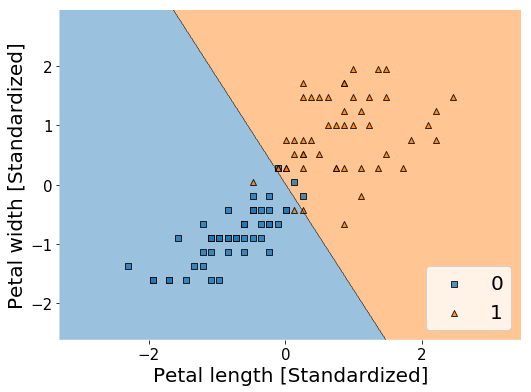

In [12]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# plot decision regions
fig, ax = plt.subplots(figsize=(8,6))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      clf=lr,  filler_feature_ranges=range(y_train.size, y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.legend(loc=4, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('fig-logistic-regression-boundray-2.png', dpi=300)
plt.show()

In [14]:
#predict the class-membership probability via the predict_proba() method. 
test_idx = 1
print('Correct label: %s\n' % y_label[y_test[test_idx]])

prob = lr.predict_proba(X_test_std[test_idx, :].reshape(1, -1))#不知道多少個的情況下轉成row為1的shape
print(prob)
print('Prob for class %s: %.2f' % (y_label[0], prob[:, 0]))
print('Prob for class %s: %.2f' % (y_label[1], prob[:, 1]))

Correct label: Iris-virginica

[[0.00649986 0.99350014]]
Prob for class Iris-versicolor: 0.01
Prob for class Iris-virginica: 0.99


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

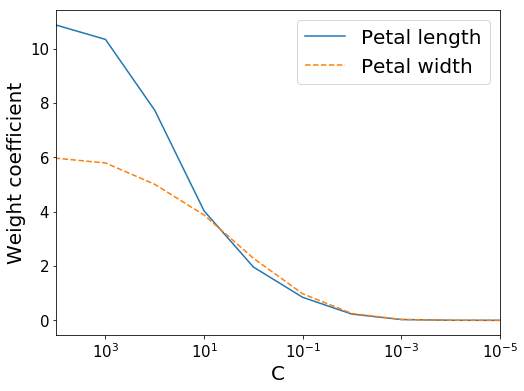

In [16]:
#One way to regularize a logistic regression classifier is to add a weight decay term in the objective (or cost function), as in Ridge regression:
weights, params = [], []
for c in np.arange(-5, 5, dtype='float32'):
  lr = LogisticRegression(C=10**c, random_state=0)
  lr.fit(X_train_std, y_train)
  # get the coefficients of w
  weights.append(lr.coef_[0])
  params.append(10**c)

fig, ax = plt.subplots(figsize=(8,6))
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1],
         label='Petal width', linestyle='--')
plt.xlim(10**4, 10**-5)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficient')
plt.legend(loc='upper right')
plt.tight_layout()
plt.legend(loc=1, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('fig-logistic-regression-c.png', dpi=300)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


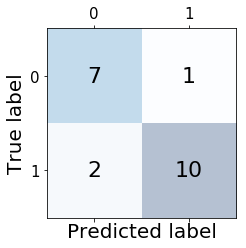

In [17]:
#Evaluation Metrics for Binary Classifiers
#there are several other evaluation metrics that allow us to quantify the performance of a model from different aspects.
#1. confusion matrix(a square matrix that reports the counts of the true positive, true negative, false positive, and false negative)
#                   predicted
#            |   P      |        N
#----------------------------------------
#         P  |  TP      |       FN
#actual   N  |  FP      |       TN
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('fig-logistic-regression-confusion-2.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()


Confusion matrix helps us know not only the count of how many errors but how they are wrong. Correct predictions counts into the diagonal entries. A good performing classifier should have a confusion matrix that is a diagonal matrix which means that the entries outside the main diagonal are all zero. 

**The error rate (ERR) =(FP+FN)/(P+N)**

**accuracy (ACC) =1-ERR=(TP+TN)/(P+N)**

The true positive rate (TPR) and false positive rate (FPR) are defined as:

**FPR=FP/N, (the lower, the better)**

**TPR=TP/P. (the higher, the better)**

The **Precision (PRE)** and **recall (REC)** metrics are defines as:

**PRE=TP/P′, (the higher, the better)** "how many points predicted as positive are indeed positive;"  
**REC=TP/P=TPR. (the higher, the better)** "how many positive points in the ground truth are successfully identified as positive." 

In practice, we may **combine PRE and REC into a single score called the F1-score**:

F1=2*[(PRE∗REC)/(PRE+REC)], (the higher, the better) 
which reaches its best value at 1 and worst at 0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


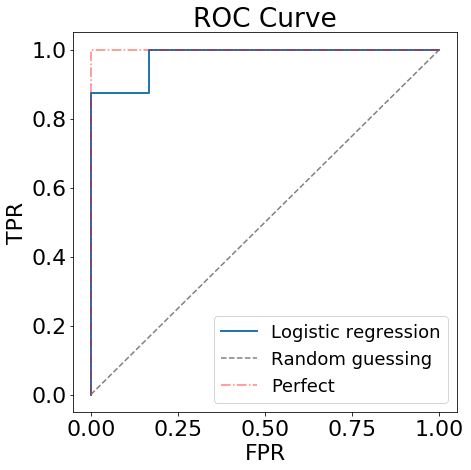

In [18]:
#Evaluation Metrics for Soft Classifiers
#Many classifiers, such as Adaline and Logistic Regression, can make "soft" predictions 
#(i.e., real values instead of the "hard" 1 or -1). We may "harden" the soft predictions by defining a decision threshold θ.
#ex: We can define a threshold θ=0.8 such that points with scores larger/smaller than 0.8 become positive/negative outputs.

#Receiver Operating Characteristic (ROC) Curve
#The receiver operator characteristic (ROC) curve measures the performance of a classifier at all possible thresholds. 
#We can draw an ROC curve by following the steps:
#1. Rank the soft predictions from highest to lowest;
#2. For each indexing threshold θ that makes the first θ points positive and the rest negative, θ=1,⋯,|X|, calculate the TPR(θ) and FPR(θ);
#3. Draw points (TPR(θ),FPR(θ)) in a 2-D plot and connect the points to get an ROC curve.
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
fig = plt.figure(figsize=(7,7))
# mean_tpr = 0.0
# mean_fpr = np.linspace(0, 1, 100)
# all_tpr = []
probas = lr.predict_proba(X_test_std) 
## we use feature 1 as positive label
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

plt.plot(fpr, tpr, lw=2,
         label='Logistic regression')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='-.',
         alpha=0.5,
         color='red',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('fig-roc-lg.png', dpi=300)
plt.show()

In [19]:
#Area Under the Curve (AUC)
#We can reduce an ROC curve to a single value by calculating the area under the curve (AUC). 
#A perfect classifier has AUC=1.0, and random guessing results in AUC=0.5
from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.98


#Evaluation Metrics for Multiclass Classification
In multiclass classification problem, we can extend the above metrics via **one-vs-all** technique, where **we treat one class as "positive" and the rest as "negative" and compute a score for the class.** If there are K classes, then we compute K scores, one for each class. However, if we just want to have a single final score, we need to decide how to combine these scores.

Scikit-learn implements the **macro** and **micro averaging methods**. For example, the micro-average of K precision scores is calculated as follows:

**PREmicro=[TP(1)+⋯+TP(K)]/[P′(1)+⋯+P′(K)]**

macro-average is simply the average of individual PRE's:

**PREmacro=[PRE(1)+⋯+PRE(K)]/K**

**Micro-averaging** is useful if we want to **weight each data point or prediction equally**, whereas **macro-averaging weights all classes equally**. 

#Training data points: 16 + 33 + 31 = 80
#Testing data points: 4 + 17 + 19 = 40
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


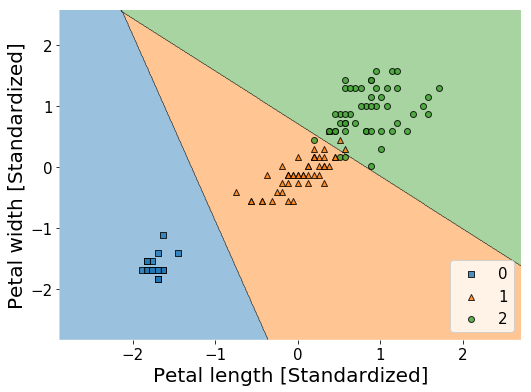

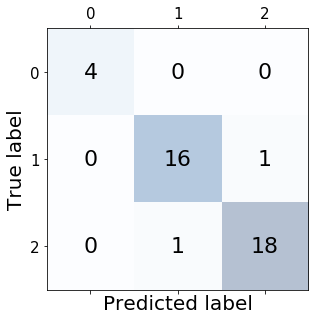

[Precision]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[Recall]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[F1-score]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
from lib import *

# prepare datasets

X = df[['Petal length', 'Petal width']].values[30:150,]
y, y_label = pd.factorize(df['Class label'].values[30:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

print('#Training data points: %d + %d + %d = %d' % ((y_train == 0).sum(), 
                                                    (y_train == 1).sum(), 
                                                    (y_train == 2).sum(), 
                                                     y_train.size))
print('#Testing data points: %d + %d + %d = %d' % ((y_test == 0).sum(), 
                                                    (y_test == 1).sum(), 
                                                    (y_test == 2).sum(), 
                                                     y_test.size))
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# standarize X

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# training & testing

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

# plot decision regions
fig, ax = plt.subplots(figsize=(8,6))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      clf=lr, filler_feature_ranges=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc=4, prop={'size': 15})
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('fig-logistic-regression-boundray-3.png', dpi=300)
plt.show()

# plot confusion matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('fig-logistic-regression-confusion-3.png', dpi=300)
plt.show()

# metrics

print('[Precision]')
p = precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (p[0], p[1], p[2]))
p = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % p)
p = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % p)

print('\n[Recall]')
r = recall_score(y_true=y_test, y_pred=y_pred,average=None)
print('Individual: %.2f, %.2f, %.2f' % (r[0], r[1], r[2]))
r = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % r)
r = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % r)

print('\n[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (f[0], f[1], f[2]))
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)